In [1]:
import os
import logging
import numpy as np
import tensorflow as tf
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

tf.get_logger().setLevel(logging.ERROR)

In [ ]:
#pip install tensorFlow

In [ ]:
#https://www.kaggle.com/code/samanemami/gan-on-tabular-data

In [2]:
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        path = os.path.join(dirname, filename)
#data = pd.read_csv(path)
data = pd.read_csv('./pima-indians-diabetes.csv')


def _df(data):
    df = pd.DataFrame(data)
    for c in range(df.shape[1]):
        mapping = {df.columns[c]: c}
        df = df.rename(columns=mapping)
    return df


X = (data.drop(columns=["Outcome"])).values
y = (data["Outcome"]).values


X = KNNImputer().fit_transform(X)
data = _df(StandardScaler().fit_transform(np.column_stack((X, y))))

In [9]:
data.shape

(768, 9)

In [10]:
new_data.shape

(768, 9)

In [11]:
X.shape

(768, 8)

In [3]:
import os
import logging
import numpy as np
import pandas as pd
import tensorflow as tf

tf.get_logger().setLevel(logging.ERROR)


class Gan():

    def __init__(self, data):


        self.data = data
        self.n_epochs = 200

    # Genereta random noise in a latent space
    def _noise(self):
        noise = np.random.normal(0, 1, self.data.shape)
        return noise

    def _generator(self):
        model = tf.keras.Sequential(name="Generator_model")
        model.add(tf.keras.layers.Dense(15, activation='relu',
                                        kernel_initializer='he_uniform',
                                        input_dim=self.data.shape[1]))
        model.add(tf.keras.layers.Dense(30, activation='relu'))
        model.add(tf.keras.layers.Dense(
            self.data.shape[1], activation='linear'))
        return model

    def _discriminator(self):
        model = tf.keras.Sequential(name="Discriminator_model")
        model.add(tf.keras.layers.Dense(25, activation='relu',
                                        kernel_initializer='he_uniform',
                                        input_dim=self.data.shape[1]))
        model.add(tf.keras.layers.Dense(50, activation='relu'))
        # sigmoid => real or fake
        model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

        return model

    # define the combined generator and discriminator model,
    # for updating the generator
    def _GAN(self, generator, discriminator):
        discriminator.trainable = False
        generator.trainable = True
        model = tf.keras.Sequential(name="GAN")
        model.add(generator)
        model.add(discriminator)
        model.compile(loss='binary_crossentropy', optimizer='adam')
        return model

    # train the generator and discriminator
    def train(self, generator, discriminator, gan):

        # determine half the size of one batch, for updating the  discriminator
        # manually enumerate epochs
        for epoch in range(self.n_epochs):
            
            # Train the discriminator
            generated_data = generator.predict(self._noise())
            labels = np.concatenate([np.ones(self.data.shape[0]), np.zeros(self.data.shape[0])])
            X = np.concatenate([self.data, generated_data])
            discriminator.trainable = True
            d_loss , _ = discriminator.train_on_batch(X, labels)

            # Train the generator
            noise = self._noise()
            g_loss = gan.train_on_batch(noise, np.ones(self.data.shape[0]))


            print('>%d, d1=%.3f, d2=%.3f' %(epoch+1, d_loss, g_loss))

        return generator

In [4]:
model = Gan(data=data)
generator = model._generator()
descriminator = model._discriminator()
gan_model = model._GAN(generator=generator, discriminator=descriminator)
trained_model = model.train(
    generator=generator, discriminator=descriminator, gan=gan_model)


C:\Users\emxxjey\AppData\Local\anaconda31\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
>1, d1=0.669, d2=0.564
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
>2, d1=0.669, d2=0.558
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
>3, d1=0.669, d2=0.552
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
>4, d1=0.670, d2=0.544
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step
>5, d1=0.671, d2=0.538
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step
>6, d1=0.671, d2=0.532
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step
>7, d1=0.672, d2=0.527
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
>8, d1=0.672, d2=0.520
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step
>9, d1=0.674, d2=0.514
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step
>10, d1=0.676, d2=0.508
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
>11, d1=0.678, d2=0.504
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
>12, d1=0.680, d2=0.498
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
>13, d1=0.683, d2=0.493
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step
>14, d1=0.686, d2=0.488
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step
>15, d1=0.689, d2=0.483
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
>

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step
>84, d1=1.104, d2=0.262
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step
>85, d1=1.109, d2=0.261
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step
>86, d1=1.115, d2=0.259
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
>87, d1=1.120, d2=0.258
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step
>88, d1=1.124, d2=0.256
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step
>89, d1=1.129, d2=0.255
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step
>90, d1=1.134, d2=0.253
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
>91, d1=1.138, d2=0.252
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
>92, d1=1.143, d2=0.250
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step
>93, d1=1.148, d2=0.249
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
>94, d1=1.153, d2=0.248
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step
>95, d1=1.157, d2=0.246
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
>96, d1=1.162, d2=0.245
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
>97, d1=1.167, d2=0.244
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step
>98, d1=1.171, d2=0.243
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step
>166, d1=1.521, d2=0.178
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step
>167, d1=1.526, d2=0.178
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step
>168, d1=1.532, d2=0.177
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step
>169, d1=1.539, d2=0.176
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
>170, d1=1.545, d2=0.175
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step
>171, d1=1.551, d2=0.175
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
>172, d1=1.557, d2=0.174
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
>173, d1=1.562, d2=0.173
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step
>174, d1=1.568, d2=0.172
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
>175, d1=1.574, d2=0.172
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
>176, d1=1.579, d2=0.171
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step
>177, d1=1.585, d2=0.170
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step
>178, d1=1.590, d2=0.170
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step
>179, d1=1.596, d2=0.169
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
>180, d1=1.601, d2=0.168
24/24 ━━━━━━━━━

In [5]:
noise = np.random.normal(0, 1, data.shape) 
new_data = _df(data=trained_model.predict(noise))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


Text(0.5, 1.0, 'synthetic Data')

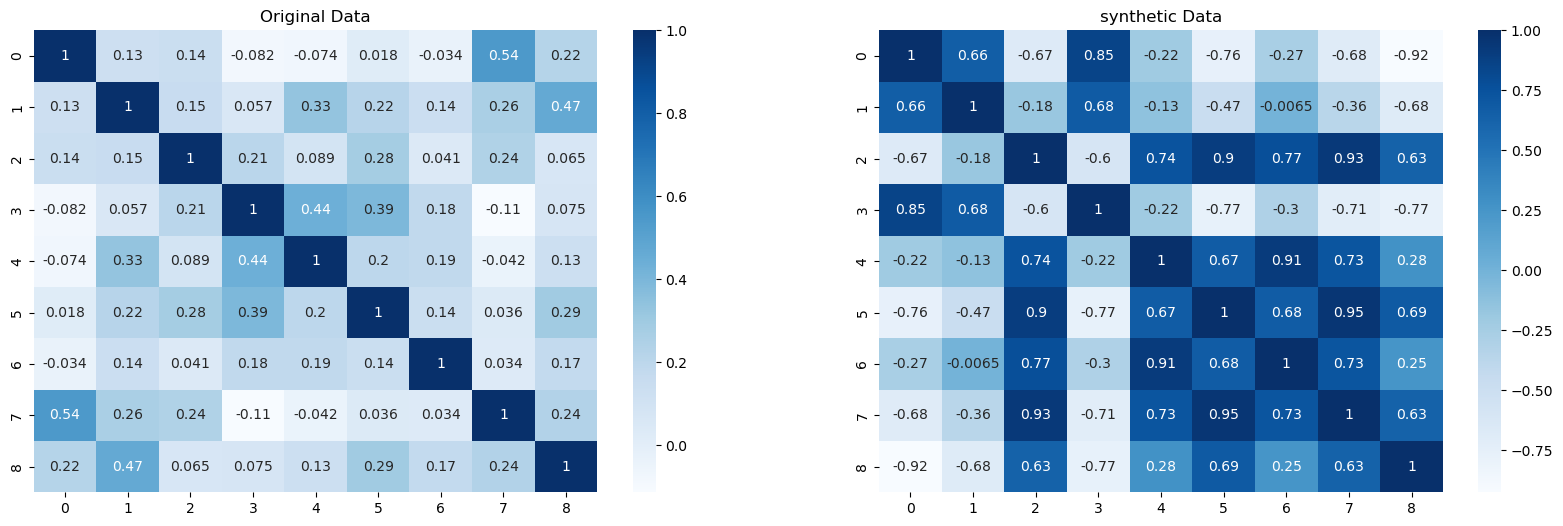

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.heatmap(data.corr(), annot=True, ax=ax[0], cmap="Blues")
sns.heatmap(new_data.corr(), annot=True, ax=ax[1], cmap="Blues")
ax[0].set_title("Original Data")
ax[1].set_title("synthetic Data")

In [7]:
new_data.head(10)

,0,1,2,3,4,5,6,7,8
0,5.465911,3.718473,-5.668332,4.827090,-4.005379,-2.654781,-3.257112,-6.452977,-5.496408
1,6.986853,2.849351,-13.760154,5.012450,-8.905318,-4.227873,-6.949619,-13.166229,-5.597887
2,6.152422,3.776937,-10.409060,6.029874,-5.410901,-3.869689,-2.199108,-11.844253,-5.199530
3,3.937165,1.951309,-7.602808,2.997141,-5.728717,-2.818462,-3.937881,-7.579836,-3.272066
4,3.872120,2.492301,-6.448876,3.019224,-3.702029,-2.384075,-1.328707,-6.532786,-3.802527
5,3.552764,1.673459,-8.496085,3.917642,-6.297652,-3.046555,-3.997707,-8.745778,-3.070304
6,5.237495,1.484472,-12.289762,6.701561,-6.584747,-4.763691,-5.184084,-11.566874,-3.720662
7,2.545715,1.665946,-4.642488,2.439710,-3.639365,-1.847866,-2.176967,-4.752047,-2.186526
8,5.003508,3.002252,-7.694712,4.533811,-3.646844,-2.723401,-2.452818,-6.742294,-3.834543
9,6.224410,3.811916,-7.973489,5.929751,-3.722018,-2.967800,-1.814613,-7.444094,-6.460715


In [22]:
data.head(10)

,0,1,2,3,4,5,6,7,8
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896
5,0.342981,-0.153185,0.253036,-1.288212,-0.692891,-0.811341,-0.818079,-0.275760,-0.732120
6,-0.250952,-1.342476,-0.987710,0.719086,0.071204,-0.125977,-0.676133,-0.616111,1.365896
7,1.827813,-0.184482,-3.572597,-1.288212,-0.692891,0.419775,-1.020427,-0.360847,-0.732120
8,-0.547919,2.381884,0.046245,1.534551,4.021922,-0.189437,-0.947944,1.681259,1.365896
9,1.233880,0.128489,1.390387,-1.288212,-0.692891,-4.060474,-0.724455,1.766346,1.365896


Text(0.5, 1.0, 'synthetic Data')

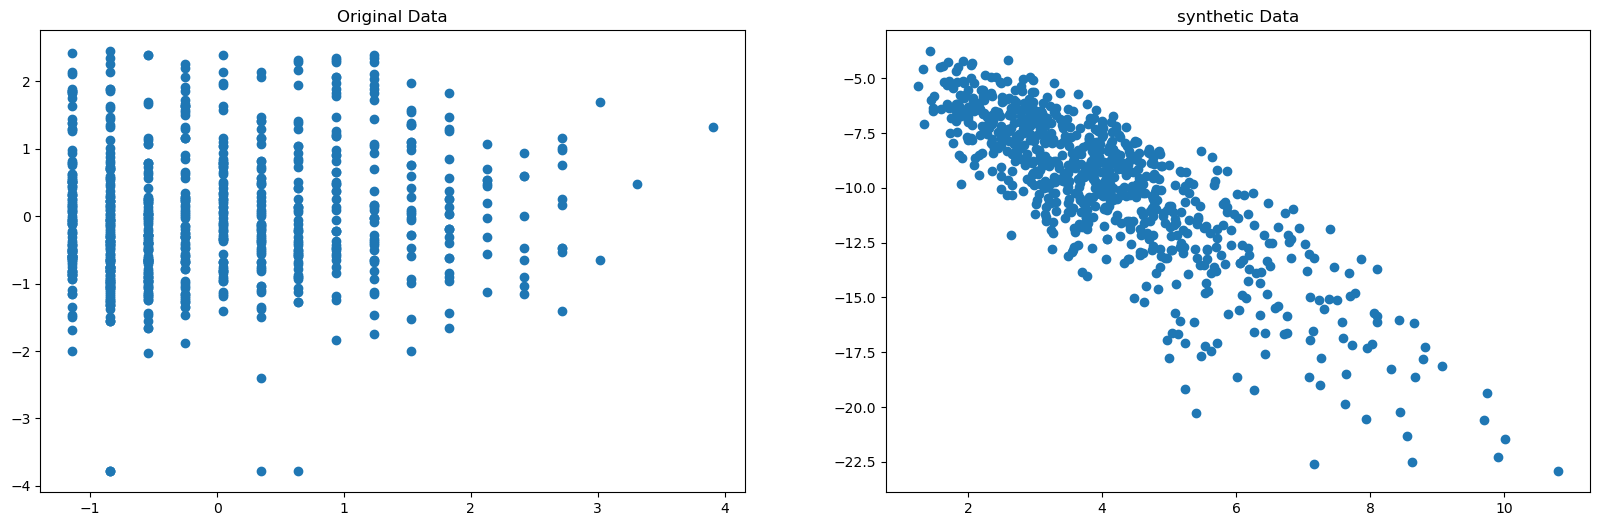

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].scatter(data.iloc[:, 0], data.iloc[:, 1])
ax[1].scatter(new_data.iloc[:, 0], new_data.iloc[:, 1])
ax[0].set_title("Original Data")
ax[1].set_title("synthetic Data")